In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

### I. London’s underground resilience

In [2]:
tube = nx.read_graphml('london.graphml')

In [3]:
type(tube)

networkx.classes.graph.Graph

In [4]:
print(nx.info(tube))

Graph with 401 nodes and 467 edges


In [5]:
for node in tube.nodes():
    tube.nodes[node]['coords'] = eval(tube.nodes[node]['coords'])
    

In [6]:
list(tube.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [7]:
list(tube.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

In [8]:
node_id = tube.nodes.get("id")

In [9]:
type(node_id)

NoneType

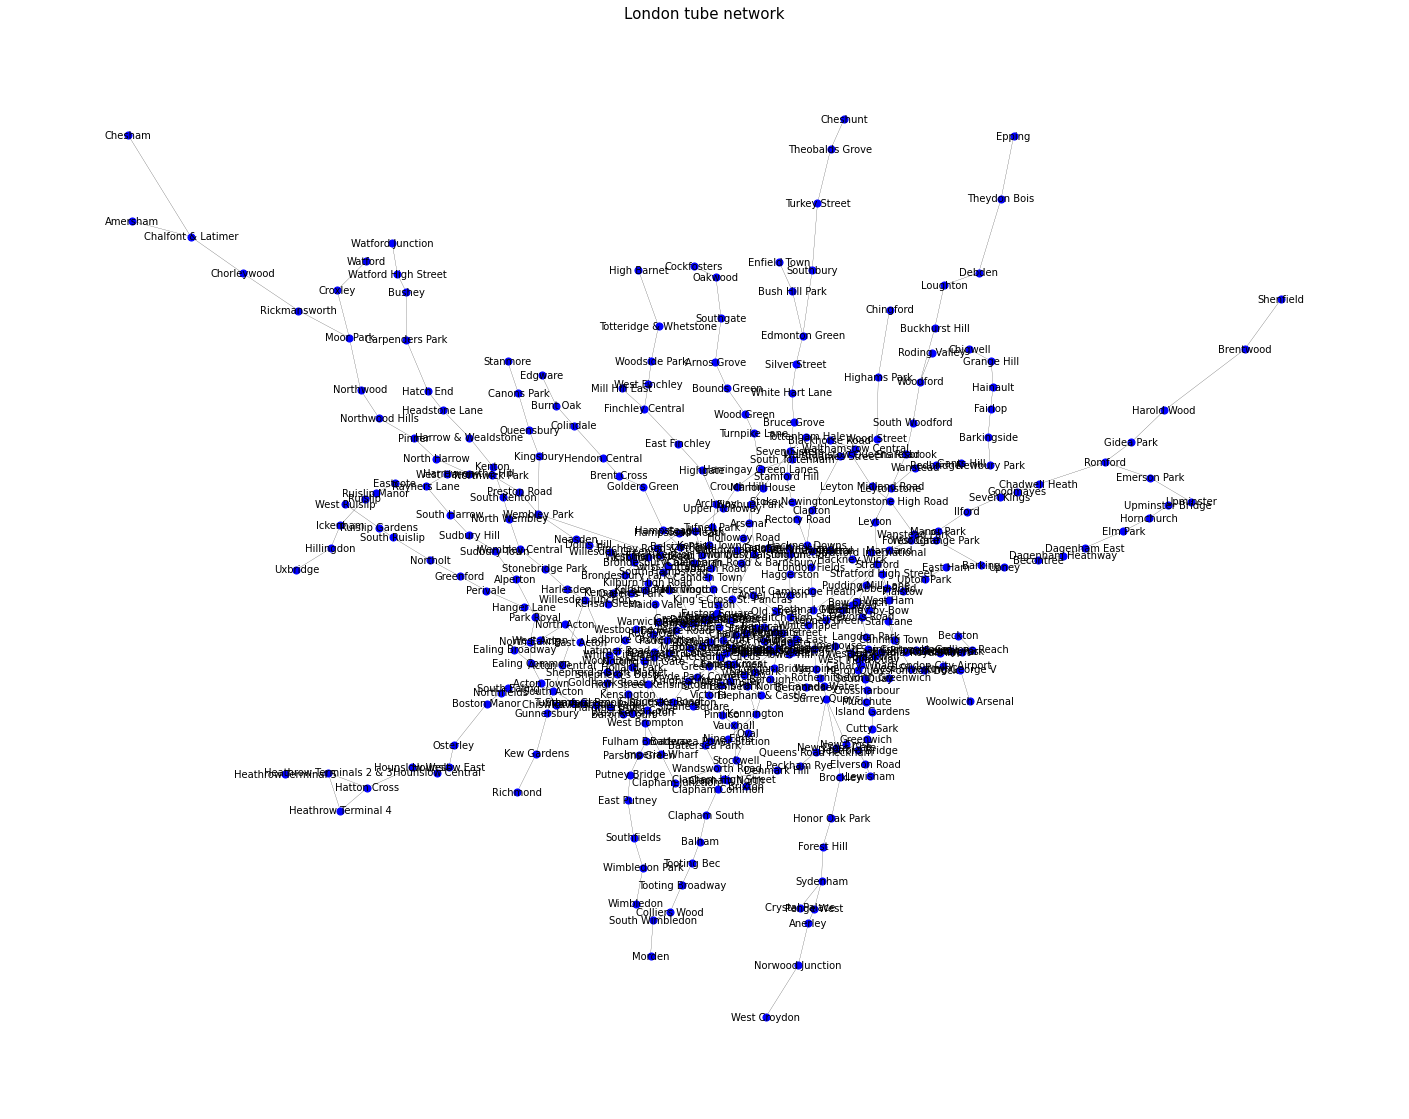

In [10]:
fig, ax = plt.subplots(figsize=(25,20))

node_labels = node_id

pos = nx.get_node_attributes(tube, 'coords')

nx.draw_networkx_nodes(tube,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(tube,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(tube,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [11]:
df = nx.to_pandas_edgelist(tube)
df[0:10]

,source,target,flows,length,line_name
0,Wembley Park,Kingsbury,12356,2916.771558,Jubilee
1,Wembley Park,Neasden,6744,2353.165938,Jubilee
2,Wembley Park,Preston Road,36601,1419.735166,Metropolitan
3,Wembley Park,Finchley Road,55216,7266.373927,Metropolitan
4,Kingsbury,Queensbury,9419,1245.995234,Jubilee
5,Queensbury,Canons Park,6385,1693.307343,Jubilee
6,Canons Park,Stanmore,3624,1419.669476,Jubilee
7,Stratford,West Ham,91801,1673.509515,Jubilee
8,Stratford,Mile End,12010,2805.001392,Central
9,Stratford,Leyton,56082,2131.342926,Central


#### I. Topological network

In this part, you will evaluate the resilience of the London’s underground through the removal of stations that can potentially make the underground vulnerable. Through the procedure outlined below you will investigate which are the stations that are most critical for the functioning of the underground, and which methodology is more appropriate to finding these stations.

##### I.1. Centrality measures:
Select 3 centrality measures to characterise nodes, aiming at identifying the most important nodes in this particular network. In addition to giving their definitions, explain what do the measures mean into the context of the underground, and why they will allow you to find the stations that are most crucial for the functioning of the underground. Compute the measures for your nodes in the network, and give the results in a table for the first 10 ranked nodes for each of the 3 measures. (9 marks, 3 per measure)

In [12]:
max_dist=max({weight for e1, e2, weight in tube.edges(data='length')})
max_dist

7266.37392749648

Degree Centrality on nodes:

In [13]:
deg_london =nx.degree_centrality(tube)
nx.set_node_attributes(tube,dict(deg_london),'degree')

In [14]:
df = pd.DataFrame(index=tube.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(tube, 'degree'))

df_sorted_deg_cen = df.sort_values(["degree"], ascending=False)
df_sorted_deg_cen[0:12]
#note: number 5 to 11 all have the same degree

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


In [15]:
#Since there are 401 nodes, so the rank is from #1 to #401
rank = [i for i in range(1,402)]
df_sorted_deg_cen['station'] = df_sorted_deg_cen.index
df_sorted_deg_cen.index = rank


In [16]:
df_sorted_deg_cen

,degree,station
1,0.0225,Stratford
2,0.0200,Bank and Monument
3,0.0175,King's Cross St. Pancras
4,0.0175,Baker Street
5,0.0150,Earl's Court
...,...,...
397,0.0025,High Barnet
398,0.0025,Battersea Park
399,0.0025,New Cross
400,0.0025,Crystal Palace


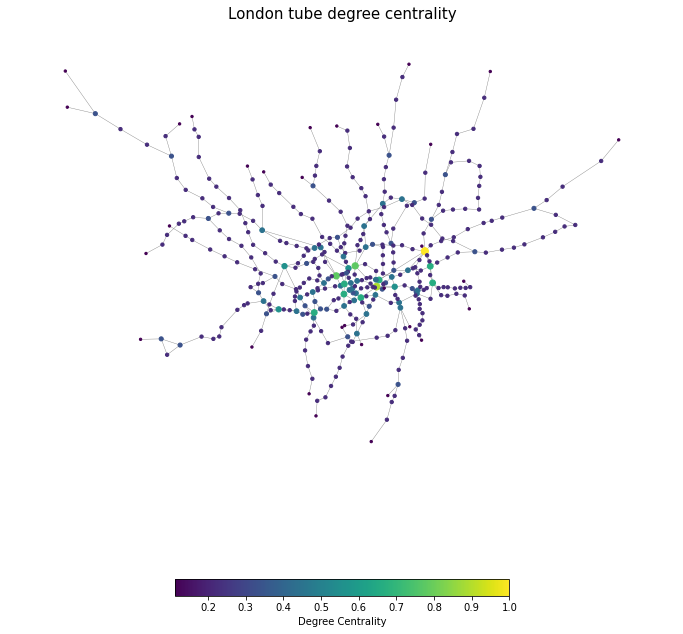

In [17]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in tube.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in tube.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in tube.nodes(data=True)]

pos=pos

fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(tube, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(tube,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

#### Topological betweenness centrality

In [18]:
bet_london_t=nx.betweenness_centrality(tube, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=tube.nodes())
df['betweenness_t'] = pd.Series(nx.get_node_attributes(tube, 'betweenness_t'))

df_sorted_bet_t = df.sort_values(["betweenness_t"], ascending=False)
df_sorted_bet_t[0:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


In [19]:
df_sorted_bet_t['station'] = df_sorted_bet_t.index
df_sorted_bet_t.index = rank

In [20]:
df_sorted_bet_t

,betweenness_t,station
1,23768.093434,Stratford
2,23181.058947,Bank and Monument
3,21610.387049,Liverpool Street
4,20373.521465,King's Cross St. Pancras
5,19464.882323,Waterloo
...,...,...
397,0.000000,Edgware
398,0.000000,Woolwich Arsenal
399,0.000000,Stratford International
400,0.000000,Watford Junction


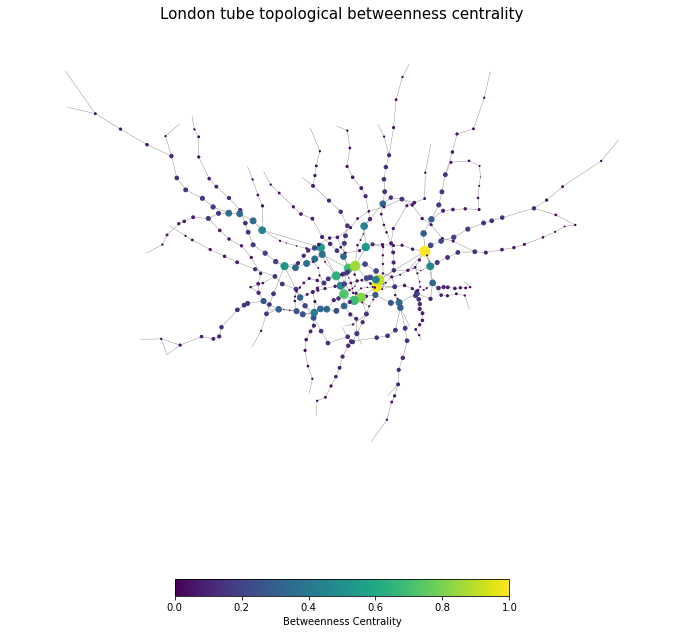

In [21]:
betweenness_t_values=[(i[1]['betweenness_t']) for i in tube.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in tube.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in tube.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(tube, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(tube, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

##### Closeness Topological Centrality:

In [22]:
clos_t=nx.closeness_centrality(tube)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=tube.nodes())
df['closeness_t'] = pd.Series(nx.get_node_attributes(tube, 'closeness_t'))

df_sorted_close = df.sort_values(["closeness_t"], ascending=False)
df_sorted_close[0:10]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


In [23]:
df_sorted_close['station'] = df_sorted_close.index
df_sorted_close.index = rank

In [24]:
df_sorted_close

,closeness_t,station
1,0.114778,Green Park
2,0.113572,Bank and Monument
3,0.113443,King's Cross St. Pancras
4,0.112549,Westminster
5,0.112265,Waterloo
...,...,...
397,0.045096,Heathrow Terminals 2 & 3
398,0.045091,Heathrow Terminal 4
399,0.044302,Watford High Street
400,0.043155,Heathrow Terminal 5


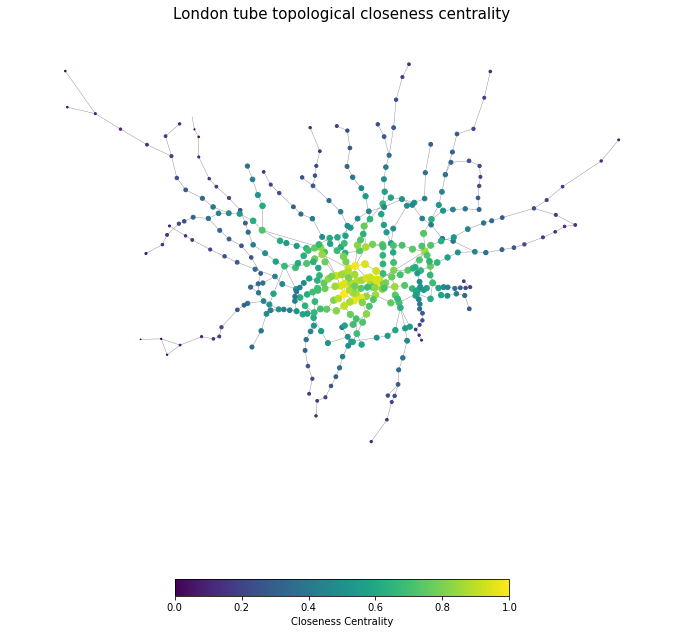

In [25]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in tube.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in tube.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in tube.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(tube, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(tube,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

In [26]:
df_rank = pd.DataFrame()  

In [27]:
df_rank['deg_cen_station'] = df_sorted_deg_cen['station']
df_rank['degree'] = df_sorted_deg_cen['degree']

df_rank['bet_t_station'] = df_sorted_bet_t['station']
df_rank['betweenness_t'] = df_sorted_bet_t['betweenness_t']

df_rank['close_station'] = df_sorted_close['station']
df_rank['closeness_t'] = df_sorted_close['closeness_t']

df_rank

,deg_cen_station,degree,bet_t_station,betweenness_t,close_station,closeness_t
1,Stratford,0.0225,Stratford,23768.093434,Green Park,0.114778
2,Bank and Monument,0.0200,Bank and Monument,23181.058947,Bank and Monument,0.113572
3,King's Cross St. Pancras,0.0175,Liverpool Street,21610.387049,King's Cross St. Pancras,0.113443
4,Baker Street,0.0175,King's Cross St. Pancras,20373.521465,Westminster,0.112549
5,Earl's Court,0.0150,Waterloo,19464.882323,Waterloo,0.112265
...,...,...,...,...,...,...
397,High Barnet,0.0025,Edgware,0.000000,Heathrow Terminals 2 & 3,0.045096
398,Battersea Park,0.0025,Woolwich Arsenal,0.000000,Heathrow Terminal 4,0.045091
399,New Cross,0.0025,Stratford International,0.000000,Watford High Street,0.044302
400,Crystal Palace,0.0025,Watford Junction,0.000000,Heathrow Terminal 5,0.043155


In [28]:
df_rank[:10]

,deg_cen_station,degree,bet_t_station,betweenness_t,close_station,closeness_t
1,Stratford,0.0225,Stratford,23768.093434,Green Park,0.114778
2,Bank and Monument,0.0200,Bank and Monument,23181.058947,Bank and Monument,0.113572
3,King's Cross St. Pancras,0.0175,Liverpool Street,21610.387049,King's Cross St. Pancras,0.113443
4,Baker Street,0.0175,King's Cross St. Pancras,20373.521465,Westminster,0.112549
5,Earl's Court,0.0150,Waterloo,19464.882323,Waterloo,0.112265
6,Oxford Circus,0.0150,Green Park,17223.622114,Oxford Circus,0.111204
7,Liverpool Street,0.0150,Euston,16624.275469,Bond Street,0.110988
8,Waterloo,0.0150,Westminster,16226.155916,Farringdon,0.110742
9,Green Park,0.0150,Baker Street,15287.107612,Angel,0.110742
10,Canning Town,0.0150,Finchley Road,13173.758009,Moorgate,0.110314


##### I.2. Impact measures: 
Find 2 different measures to evaluate the impact of the node removal on the network. These are global measures referring to the whole network and not to particular nodes or links. Explain whether these two measures to evaluate the impact are specific to the London underground, or whether they would also be useful to evaluate the resilience of any other network. (10 marks, 5 per measure) 

##### I.3. Node removal: 

##### Strategy 1: Non-sequential removal
###### Step 1: make copies for the network

In [29]:
tube2=tube.copy()
tube3=tube.copy()
tube4=tube.copy()

In [30]:
l_oroginal=list(tube.nodes)
len(l_oroginal)

401

###### Step 2: remove the top 10 stations identified in each centrality measure

In [31]:
#create an empty dataframe first
index_i3 = ['1','2','3','4','5','6','7','8','9','10']
column_i3 = ['Station_removed_deg','Giant_component_deg', 'Giant_count_deg', 'Average_shortest_path_deg',
            'Station_removed_bet','Giant_component_bet', 'Giant_count_bet','Average_shortest_path_bet',
            'Station_removed_close','Giant_component_close', 'Giant_count_close','Average_shortest_path_close',
            ]
df_strat_1 = pd.DataFrame(index=index_i3,columns=column_i3)

In [32]:
df_strat_1

,Station_removed_deg,Giant_component_deg,Giant_count_deg,Average_shortest_path_deg,Station_removed_bet,Giant_component_bet,Giant_count_bet,Average_shortest_path_bet,Station_removed_close,Giant_component_close,Giant_count_close,Average_shortest_path_close
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### a. degree centrality
<i> Note: 11 stations are removed here because 7 stations (5~11) all have the same degree </i>

In [33]:
#Identify the top 10 stations
values_sorted_deg = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
sorted_ten_deg=[e for e,v in values_sorted_deg[:10]]
sorted_ten_deg

['Stratford',
 'Bank and Monument',
 'Baker Street',
 "King's Cross St. Pancras",
 'West Ham',
 'Canning Town',
 'Waterloo',
 'Green Park',
 'Oxford Circus',
 'Liverpool Street']

In [34]:
#remove them one by one using a for loop

for x in range(10):
    
    print(f'Name of the highest ranked node: {sorted_ten_deg[x]}')
    removed_station = []
    removed_station.append(sorted_ten_deg[x])
    df_strat_1['Station_removed_deg'][x] = removed_station[0]
    
    #remove that node from the network
    to_del=[ ]
    to_del.append(sorted_ten_deg[x])
    to_del
    tube2.remove_nodes_from(to_del)
    print(f'Now has {len(list(tube2.nodes))} nodes')


    #evaluate using giant component
    Subg_2 = [tube2.subgraph(c).copy() for c in nx.connected_components(tube2)]
    [len(subgraph.nodes) for subgraph in Subg_2]
    
    components_2 = nx.connected_components(tube2)
    largest_component_2 = max(components_2, key=len)
    Largest_subgraph_2 = tube2.subgraph(largest_component_2)
    
    print(f'Now the largest component has {Largest_subgraph_2.number_of_nodes()} point.')
    print(f'There are {len([len(subgraph.nodes) for subgraph in Subg_2])} components in this network now.')

    #add to dataframe
    df_strat_1['Giant_component_deg'][x] = Largest_subgraph_2.number_of_nodes()
    df_strat_1['Giant_count_deg'][x] = len([len(subgraph.nodes) for subgraph in Subg_2])
    
    #evaluate using average shorest path
    
    tube_path_2=nx.path_graph(Largest_subgraph_2)
    print(f'Now the average shortest path for the largest component is {nx.average_shortest_path_length(tube_path_2)}')
    
    #add to dataframe
    df_strat_1['Average_shortest_path_deg'][x] = nx.average_shortest_path_length(tube_path_2)


    #recalculate the degree centrality
    deg_london2 =nx.degree_centrality(tube2)
    nx.set_node_attributes(tube2,dict(deg_london2),'degree')
    
    print('-------------------------------------')

Name of the highest ranked node: Stratford
Now has 400 nodes
Now the largest component has 379 point.
There are 3 components in this network now.
Now the average shortest path for the largest component is 126.66666666666667
-------------------------------------
Name of the highest ranked node: Bank and Monument
Now has 399 nodes
Now the largest component has 378 point.
There are 3 components in this network now.
Now the average shortest path for the largest component is 126.33333333333333
-------------------------------------
Name of the highest ranked node: Baker Street
Now has 398 nodes
Now the largest component has 377 point.
There are 3 components in this network now.
Now the average shortest path for the largest component is 126.0
-------------------------------------
Name of the highest ranked node: King's Cross St. Pancras
Now has 397 nodes
Now the largest component has 374 point.
There are 4 components in this network now.
Now the average shortest path for the largest component

In [35]:
df_strat_1

,Station_removed_deg,Giant_component_deg,Giant_count_deg,Average_shortest_path_deg,Station_removed_bet,Giant_component_bet,Giant_count_bet,Average_shortest_path_bet,Station_removed_close,Giant_component_close,Giant_count_close,Average_shortest_path_close
1,Stratford,379,3,126.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bank and Monument,378,3,126.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baker Street,377,3,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,King's Cross St. Pancras,374,4,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,West Ham,371,5,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Canning Town,356,8,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Waterloo,355,8,118.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Green Park,354,8,118.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Oxford Circus,352,9,117.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Liverpool Street,346,10,115.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### b. Topological Betweenness centrality

In [36]:
#Identify the top 10 stations
values_sorted_bet = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_ten_bet=[e for e,v in values_sorted_bet[:10]]
sorted_ten_bet

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [37]:
for x in range(10):
    
    print(f'Name of the highest ranked node: {sorted_ten_bet[x]}')
    removed_station = []
    removed_station.append(sorted_ten_bet[x])
    df_strat_1['Station_removed_bet'][x] = removed_station[0]
    
    #remove that node from the network
    to_del=[ ]
    to_del.append(sorted_ten_bet[x])
    to_del
    tube3.remove_nodes_from(to_del)
    print(f'Now has {len(list(tube3.nodes))} nodes')


    #evaluate using giant component
    Subg_3 = [tube3.subgraph(c).copy() for c in nx.connected_components(tube3)]
    [len(subgraph.nodes) for subgraph in Subg_3]
    
    components_3 = nx.connected_components(tube3)
    largest_component_3 = max(components_3, key=len)
    Largest_subgraph_3 = tube3.subgraph(largest_component_3)
    
    print(f'Now the largest component has {Largest_subgraph_3.number_of_nodes()} point.')
    print(f'There are {len([len(subgraph.nodes) for subgraph in Subg_3])} components in this network now.')

    #add to dataframe
    df_strat_1['Giant_component_bet'][x] = Largest_subgraph_3.number_of_nodes()
    df_strat_1['Giant_count_bet'][x] = len([len(subgraph.nodes) for subgraph in Subg_3])

    
    #evaluate using average shorest path
    
    tube_path_3=nx.path_graph(Largest_subgraph_3)
    print(f'Now the average shortest path for the largest component is {nx.average_shortest_path_length(tube_path_3)}')
    
    #add to dataframe
    df_strat_1['Average_shortest_path_bet'][x] = nx.average_shortest_path_length(tube_path_3)


    #recalculate the betweenness centrality    
    bet_london_t3 =nx.betweenness_centrality(tube3, normalized=False)
    nx.set_node_attributes(tube3,dict(bet_london_t3),'betweenness_t')
    
    print('-------------------------------------')

Name of the highest ranked node: Stratford
Now has 400 nodes
Now the largest component has 379 point.
There are 3 components in this network now.
Now the average shortest path for the largest component is 126.66666666666667
-------------------------------------
Name of the highest ranked node: Bank and Monument
Now has 399 nodes
Now the largest component has 378 point.
There are 3 components in this network now.
Now the average shortest path for the largest component is 126.33333333333333
-------------------------------------
Name of the highest ranked node: Liverpool Street
Now has 398 nodes
Now the largest component has 377 point.
There are 3 components in this network now.
Now the average shortest path for the largest component is 126.0
-------------------------------------
Name of the highest ranked node: King's Cross St. Pancras
Now has 397 nodes
Now the largest component has 371 point.
There are 4 components in this network now.
Now the average shortest path for the largest compo

In [38]:
df_strat_1

,Station_removed_deg,Giant_component_deg,Giant_count_deg,Average_shortest_path_deg,Station_removed_bet,Giant_component_bet,Giant_count_bet,Average_shortest_path_bet,Station_removed_close,Giant_component_close,Giant_count_close,Average_shortest_path_close
1,Stratford,379,3,126.666667,Stratford,379,3,126.666667,NaN,NaN,NaN,NaN
2,Bank and Monument,378,3,126.333333,Bank and Monument,378,3,126.333333,NaN,NaN,NaN,NaN
3,Baker Street,377,3,126.0,Liverpool Street,377,3,126.0,NaN,NaN,NaN,NaN
4,King's Cross St. Pancras,374,4,125.0,King's Cross St. Pancras,371,4,124.0,NaN,NaN,NaN,NaN
5,West Ham,371,5,124.0,Waterloo,370,4,123.666667,NaN,NaN,NaN,NaN
6,Canning Town,356,8,119.0,Green Park,369,4,123.333333,NaN,NaN,NaN,NaN
7,Waterloo,355,8,118.666667,Euston,346,5,115.666667,NaN,NaN,NaN,NaN
8,Green Park,354,8,118.333333,Westminster,345,5,115.333333,NaN,NaN,NaN,NaN
9,Oxford Circus,352,9,117.666667,Baker Street,342,6,114.333333,NaN,NaN,NaN,NaN
10,Liverpool Street,346,10,115.666667,Finchley Road,339,7,113.333333,NaN,NaN,NaN,NaN


###### c. Topological Closeness centrality

In [39]:
#Identify the top 10 stations
values_sorted_close = sorted(clos_t.items(), key=itemgetter(1), reverse=True)
sorted_ten_close =[e for e,v in values_sorted_close[:10]]
sorted_ten_close

['Green Park',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Westminster',
 'Waterloo',
 'Oxford Circus',
 'Bond Street',
 'Farringdon',
 'Angel',
 'Moorgate']

In [40]:
for x in range(10):
    
    print(f'Name of the highest ranked node: {sorted_ten_close[x]}')
    removed_station = []
    removed_station.append(sorted_ten_close[x])
    df_strat_1['Station_removed_close'][x] = removed_station[0]
    
    #remove that node from the network
    to_del=[ ]
    to_del.append(sorted_ten_close[x])
    to_del
    tube4.remove_nodes_from(to_del)
    print(f'Now has {len(list(tube4.nodes))} nodes')


    #evaluate using giant component
    Subg_4 = [tube4.subgraph(c).copy() for c in nx.connected_components(tube4)]
    [len(subgraph.nodes) for subgraph in Subg_4]
    
    components_4 = nx.connected_components(tube4)
    largest_component_4 = max(components_4, key=len)
    Largest_subgraph_4 = tube4.subgraph(largest_component_4)
    
    print(f'Now the largest component has {Largest_subgraph_4.number_of_nodes()} point.')
    print(f'There are {len([len(subgraph.nodes) for subgraph in Subg_4])} components in this network now.')

    #add to dataframe
    df_strat_1['Giant_component_close'][x] = Largest_subgraph_4.number_of_nodes()
    df_strat_1['Giant_count_close'][x] = len([len(subgraph.nodes) for subgraph in Subg_4])

    
    #evaluate using average shorest path
    tube_path_4=nx.path_graph(Largest_subgraph_4)
    print(f'Now the average shortest path for the largest component is {nx.average_shortest_path_length(tube_path_4)}')
    
    #add to dataframe
    df_strat_1['Average_shortest_path_close'][x] = nx.average_shortest_path_length(tube_path_4)

    
    #recalculate the centrality
    close_t4 =nx.closeness_centrality(tube4)
    nx.set_node_attributes(tube4,close_t4,'closeness_t')
    
    print('-------------------------------------')

Name of the highest ranked node: Green Park
Now has 400 nodes
Now the largest component has 400 point.
There are 1 components in this network now.
Now the average shortest path for the largest component is 133.66666666666666
-------------------------------------
Name of the highest ranked node: Bank and Monument
Now has 399 nodes
Now the largest component has 399 point.
There are 1 components in this network now.
Now the average shortest path for the largest component is 133.33333333333334
-------------------------------------
Name of the highest ranked node: King's Cross St. Pancras
Now has 398 nodes
Now the largest component has 398 point.
There are 1 components in this network now.
Now the average shortest path for the largest component is 133.0
-------------------------------------
Name of the highest ranked node: Westminster
Now has 397 nodes
Now the largest component has 397 point.
There are 1 components in this network now.
Now the average shortest path for the largest component

In [41]:
df_strat_1

,Station_removed_deg,Giant_component_deg,Giant_count_deg,Average_shortest_path_deg,Station_removed_bet,Giant_component_bet,Giant_count_bet,Average_shortest_path_bet,Station_removed_close,Giant_component_close,Giant_count_close,Average_shortest_path_close
1,Stratford,379,3,126.666667,Stratford,379,3,126.666667,Green Park,400,1,133.666667
2,Bank and Monument,378,3,126.333333,Bank and Monument,378,3,126.333333,Bank and Monument,399,1,133.333333
3,Baker Street,377,3,126.0,Liverpool Street,377,3,126.0,King's Cross St. Pancras,398,1,133.0
4,King's Cross St. Pancras,374,4,125.0,King's Cross St. Pancras,371,4,124.0,Westminster,397,1,132.666667
5,West Ham,371,5,124.0,Waterloo,370,4,123.666667,Waterloo,396,1,132.333333
6,Canning Town,356,8,119.0,Green Park,369,4,123.333333,Oxford Circus,395,1,132.0
7,Waterloo,355,8,118.666667,Euston,346,5,115.666667,Bond Street,394,1,131.666667
8,Green Park,354,8,118.333333,Westminster,345,5,115.333333,Farringdon,393,1,131.333333
9,Oxford Circus,352,9,117.666667,Baker Street,342,6,114.333333,Angel,392,1,131.0
10,Liverpool Street,346,10,115.666667,Finchley Road,339,7,113.333333,Moorgate,389,3,130.0


###### Step 3: View the removal result and plot all components

In [42]:
Subg_2_final = [tube2.subgraph(c).copy() for c in nx.connected_components(tube2)]
[len(subgraph.nodes) for subgraph in Subg_2]

[346, 20, 2, 5, 2, 1, 8, 1, 5, 1]

In [43]:
Subg_3_final = [tube3.subgraph(c).copy() for c in nx.connected_components(tube3)]
[len(subgraph.nodes) for subgraph in Subg_3]

[339, 2, 20, 2, 5, 1, 22]

In [44]:
Subg_4_final = [tube4.subgraph(c).copy() for c in nx.connected_components(tube4)]
[len(subgraph.nodes) for subgraph in Subg_4]

[389, 1, 1]

In [45]:
S_2 = [tube2.subgraph(c).copy() for c in nx.connected_components(tube2)]
S_3 = [tube3.subgraph(c).copy() for c in nx.connected_components(tube3)]
S_4 = [tube4.subgraph(c).copy() for c in nx.connected_components(tube4)]

##### All components for centrality degree

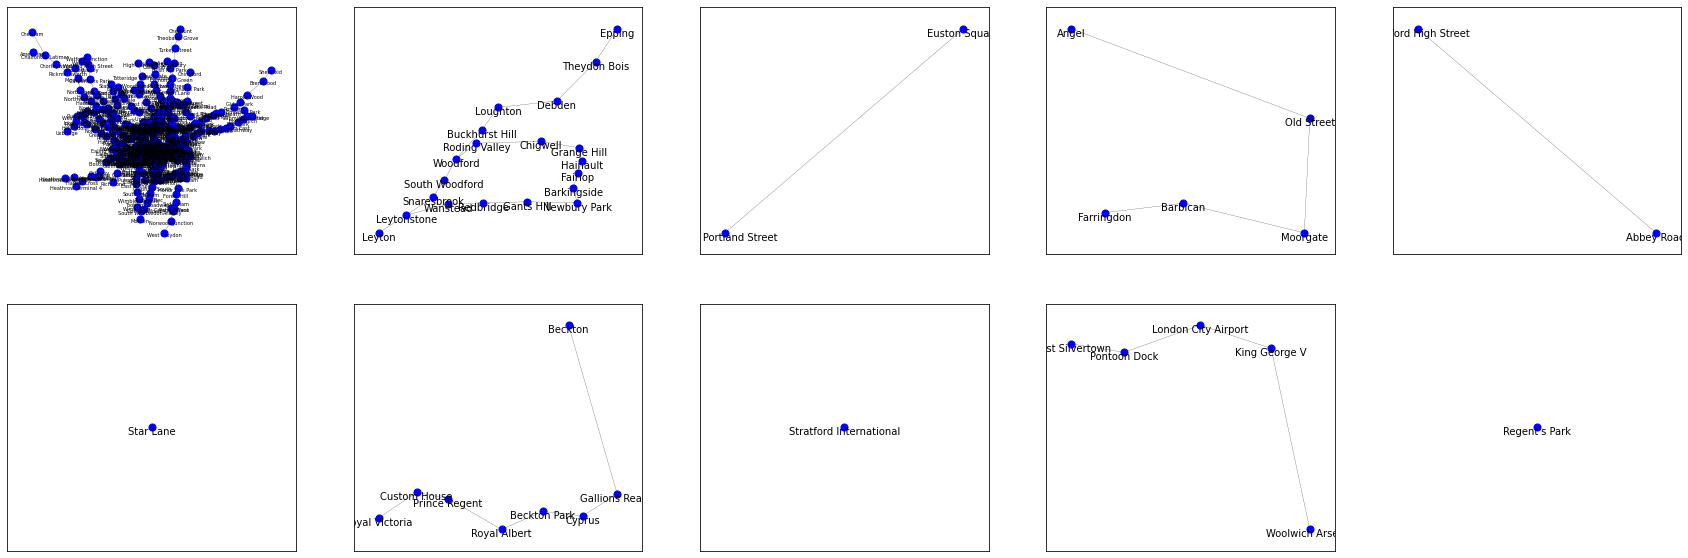

In [46]:
fig, axes = plt.subplots(2,5,figsize=(30,10))

pos0 = nx.get_node_attributes(S_2[0], 'coords')
pos1 = nx.get_node_attributes(S_2[1], 'coords')
pos2 = nx.get_node_attributes(S_2[2], 'coords')
pos3 = nx.get_node_attributes(S_2[3], 'coords')
pos4 = nx.get_node_attributes(S_2[4], 'coords')
pos5 = nx.get_node_attributes(S_2[5], 'coords')
pos6 = nx.get_node_attributes(S_2[6], 'coords')
pos7 = nx.get_node_attributes(S_2[7], 'coords')
pos8 = nx.get_node_attributes(S_2[8], 'coords')
pos9 = nx.get_node_attributes(S_2[9], 'coords')

nx.draw_networkx_labels(S_2[0],pos0, node_labels, font_size=5, font_color='black',ax=axes[0,0], verticalalignment='top')
nx.draw_networkx_labels(S_2[1],pos1, node_labels, font_size=10, font_color='black',ax=axes[0,1], verticalalignment='top')
nx.draw_networkx_labels(S_2[2],pos2, node_labels, font_size=10, font_color='black',ax=axes[0,2], verticalalignment='top')
nx.draw_networkx_labels(S_2[3],pos3, node_labels, font_size=10, font_color='black',ax=axes[0,3], verticalalignment='top')
nx.draw_networkx_labels(S_2[4],pos4, node_labels, font_size=10, font_color='black',ax=axes[0,4], verticalalignment='top')
nx.draw_networkx_labels(S_2[5],pos5, node_labels, font_size=10, font_color='black',ax=axes[1,0], verticalalignment='top')
nx.draw_networkx_labels(S_2[6],pos6, node_labels, font_size=10, font_color='black',ax=axes[1,1], verticalalignment='top')
nx.draw_networkx_labels(S_2[7],pos7, node_labels, font_size=10, font_color='black',ax=axes[1,2], verticalalignment='top')
nx.draw_networkx_labels(S_2[8],pos8, node_labels, font_size=10, font_color='black',ax=axes[1,3], verticalalignment='top')
nx.draw_networkx_labels(S_2[9],pos9, node_labels, font_size=10, font_color='black',ax=axes[1,4], verticalalignment='top')

nx.draw_networkx_nodes(S_2[0],pos0,node_size=50,node_color='b',ax=axes[0,0])
nx.draw_networkx_nodes(S_2[1],pos1,node_size=50,node_color='b',ax=axes[0,1])
nx.draw_networkx_nodes(S_2[2],pos2,node_size=50,node_color='b',ax=axes[0,2])
nx.draw_networkx_nodes(S_2[3],pos3,node_size=50,node_color='b',ax=axes[0,3])
nx.draw_networkx_nodes(S_2[4],pos4,node_size=50,node_color='b',ax=axes[0,4])
nx.draw_networkx_nodes(S_2[5],pos5,node_size=50,node_color='b',ax=axes[1,0])
nx.draw_networkx_nodes(S_2[6],pos6,node_size=50,node_color='b',ax=axes[1,1])
nx.draw_networkx_nodes(S_2[7],pos7,node_size=50,node_color='b',ax=axes[1,2])
nx.draw_networkx_nodes(S_2[8],pos8,node_size=50,node_color='b',ax=axes[1,3])
nx.draw_networkx_nodes(S_2[9],pos9,node_size=50,node_color='b',ax=axes[1,4])

nx.draw_networkx_edges(S_2[0],pos0,arrows=False,width=0.2,ax=axes[0,0])
nx.draw_networkx_edges(S_2[1],pos1,arrows=False,width=0.2,ax=axes[0,1])
nx.draw_networkx_edges(S_2[2],pos2,arrows=False,width=0.2,ax=axes[0,2])
nx.draw_networkx_edges(S_2[3],pos3,arrows=False,width=0.2,ax=axes[0,3])
nx.draw_networkx_edges(S_2[4],pos4,arrows=False,width=0.2,ax=axes[0,4])
nx.draw_networkx_edges(S_2[5],pos5,arrows=False,width=0.2,ax=axes[1,0])
nx.draw_networkx_edges(S_2[6],pos6,arrows=False,width=0.2,ax=axes[1,1])
nx.draw_networkx_edges(S_2[7],pos7,arrows=False,width=0.2,ax=axes[1,2])
nx.draw_networkx_edges(S_2[8],pos8,arrows=False,width=0.2,ax=axes[1,3])
nx.draw_networkx_edges(S_2[9],pos9,arrows=False,width=0.2,ax=axes[1,4])


m = 1
n = 4
for j in range(m):
    for k in range(n):
        axes[m,n].axis('off')

##### All components for topological betweenness degree

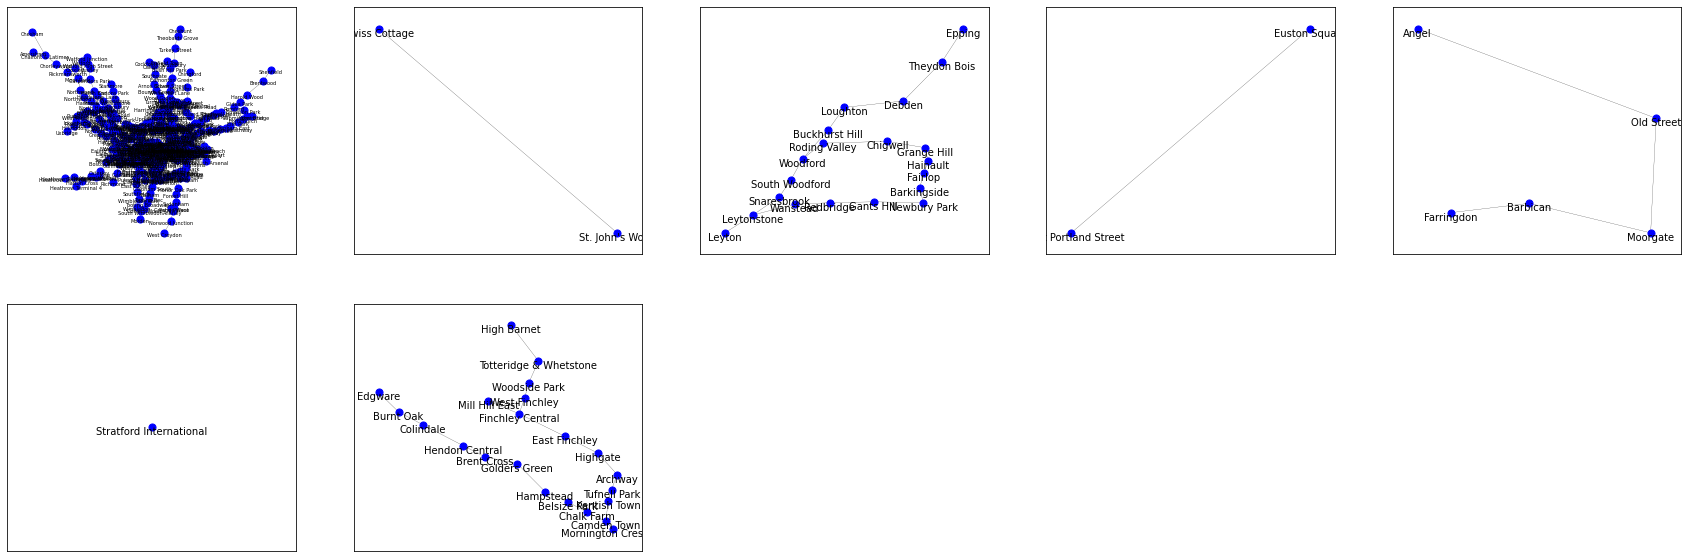

In [47]:
fig, axes = plt.subplots(2,5,figsize=(30,10))

pos0 = nx.get_node_attributes(S_3[0], 'coords')
pos1 = nx.get_node_attributes(S_3[1], 'coords')
pos2 = nx.get_node_attributes(S_3[2], 'coords')
pos3 = nx.get_node_attributes(S_3[3], 'coords')
pos4 = nx.get_node_attributes(S_3[4], 'coords')
pos5 = nx.get_node_attributes(S_3[5], 'coords')
pos6 = nx.get_node_attributes(S_3[6], 'coords')


nx.draw_networkx_labels(S_3[0],pos0, node_labels, font_size=5, font_color='black',ax=axes[0,0], verticalalignment='top')
nx.draw_networkx_labels(S_3[1],pos1, node_labels, font_size=10, font_color='black',ax=axes[0,1], verticalalignment='top')
nx.draw_networkx_labels(S_3[2],pos2, node_labels, font_size=10, font_color='black',ax=axes[0,2], verticalalignment='top')
nx.draw_networkx_labels(S_3[3],pos3, node_labels, font_size=10, font_color='black',ax=axes[0,3], verticalalignment='top')
nx.draw_networkx_labels(S_3[4],pos4, node_labels, font_size=10, font_color='black',ax=axes[0,4], verticalalignment='top')
nx.draw_networkx_labels(S_3[5],pos5, node_labels, font_size=10, font_color='black',ax=axes[1,0], verticalalignment='top')
nx.draw_networkx_labels(S_3[6],pos6, node_labels, font_size=10, font_color='black',ax=axes[1,1], verticalalignment='top')


nx.draw_networkx_nodes(S_3[0],pos0,node_size=50,node_color='b',ax=axes[0,0])
nx.draw_networkx_nodes(S_3[1],pos1,node_size=50,node_color='b',ax=axes[0,1])
nx.draw_networkx_nodes(S_3[2],pos2,node_size=50,node_color='b',ax=axes[0,2])
nx.draw_networkx_nodes(S_3[3],pos3,node_size=50,node_color='b',ax=axes[0,3])
nx.draw_networkx_nodes(S_3[4],pos4,node_size=50,node_color='b',ax=axes[0,4])
nx.draw_networkx_nodes(S_3[5],pos5,node_size=50,node_color='b',ax=axes[1,0])
nx.draw_networkx_nodes(S_3[6],pos6,node_size=50,node_color='b',ax=axes[1,1])


nx.draw_networkx_edges(S_3[0],pos0,arrows=False,width=0.2,ax=axes[0,0])
nx.draw_networkx_edges(S_3[1],pos1,arrows=False,width=0.2,ax=axes[0,1])
nx.draw_networkx_edges(S_3[2],pos2,arrows=False,width=0.2,ax=axes[0,2])
nx.draw_networkx_edges(S_3[3],pos3,arrows=False,width=0.2,ax=axes[0,3])
nx.draw_networkx_edges(S_3[4],pos4,arrows=False,width=0.2,ax=axes[0,4])
nx.draw_networkx_edges(S_3[5],pos5,arrows=False,width=0.2,ax=axes[1,0])
nx.draw_networkx_edges(S_3[6],pos6,arrows=False,width=0.2,ax=axes[1,1])




m = 1
n = 4
for j in range(m):
    for k in range(n):
        axes[m,n].axis('off')
fig.delaxes(axes[1][2])
fig.delaxes(axes[1][3])
fig.delaxes(axes[1][4])

##### All components for topological close degree

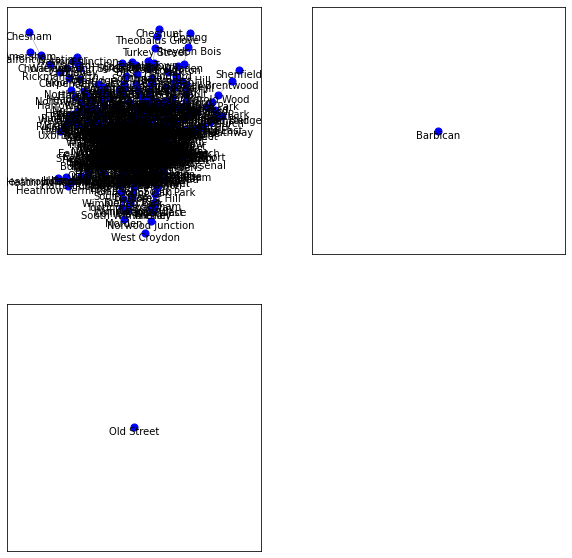

In [48]:
fig, axes = plt.subplots(2,2,figsize=(10,10))

pos0 = nx.get_node_attributes(S_4[0], 'coords')
pos1 = nx.get_node_attributes(S_4[1], 'coords')
pos2 = nx.get_node_attributes(S_4[2], 'coords')

nx.draw_networkx_labels(S_4[0],pos0, node_labels, font_size=10, font_color='black',ax=axes[0,0], verticalalignment='top')
nx.draw_networkx_labels(S_4[1],pos1, node_labels, font_size=10, font_color='black',ax=axes[0,1], verticalalignment='top')
nx.draw_networkx_labels(S_4[2],pos2, node_labels, font_size=10, font_color='black',ax=axes[1,0], verticalalignment='top')


nx.draw_networkx_nodes(S_4[0],pos0,node_size=50,node_color='b',ax=axes[0,0])
nx.draw_networkx_nodes(S_4[1],pos1,node_size=50,node_color='b',ax=axes[0,1])
nx.draw_networkx_nodes(S_4[2],pos2,node_size=50,node_color='b',ax=axes[1,0])


nx.draw_networkx_edges(S_4[0],pos0,arrows=False,width=0.2,ax=axes[0,0])
nx.draw_networkx_edges(S_4[1],pos1,arrows=False,width=0.2,ax=axes[0,1])
nx.draw_networkx_edges(S_4[2],pos2,arrows=False,width=0.2,ax=axes[1,0])


m = 1
n = 1
for j in range(m):
    for k in range(n):
        axes[m,n].axis('off')

##### Strategy 2: Sequential removal
###### Step 1: make copies for the network

In [49]:
tube2_i3=tube.copy()
tube3_i3=tube.copy()
tube4_i3=tube.copy()

In [50]:
#Create an empty dataframe for storing values from strategt 2
df_strat_2 = pd.DataFrame(index=index_i3,columns=column_i3)

In [51]:
df_strat_2

,Station_removed_deg,Giant_component_deg,Giant_count_deg,Average_shortest_path_deg,Station_removed_bet,Giant_component_bet,Giant_count_bet,Average_shortest_path_bet,Station_removed_close,Giant_component_close,Giant_count_close,Average_shortest_path_close
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Step 2: Remove the highest ranked node, then recalculate the degree centrality.
Note: this step is repeated 10 times

###### a. Degree Centrality
It should be noted that only one station is removed each time, other stations tied with the same degree is not removed in that particular repitation

In [52]:
for x in range(10):
    #Calculate degree value for each node
    degree_values_i3=[(i[1]['degree']) for i in tube2_i3.nodes(data=True)]
    #Identify the node with the largest value
    maxbet_i3_deg=[n for n in tube2_i3.nodes() if tube2_i3.nodes[n]['degree'] == max(degree_values_i3)]
    
    print(f'Name of the highest ranked node: {maxbet_i3_deg[0]}')
    removed_station = []
    removed_station.append(maxbet_i3_deg[0])
    df_strat_2['Station_removed_deg'][x] = removed_station[0]
    
    
    #remove that node from the network
    to_del=[ ]
    to_del.append(maxbet_i3_deg[0])
    to_del
    tube2_i3.remove_nodes_from(to_del)
    print(f'Now has {len(list(tube2_i3.nodes))} nodes')
    
    #evaluate using giant component
    Subg_2_i3 = [tube2_i3.subgraph(c).copy() for c in nx.connected_components(tube2_i3)]
    [len(subgraph.nodes) for subgraph in Subg_2_i3]
    
    components_2_i3 = nx.connected_components(tube2_i3)
    largest_component_2_i3 = max(components_2_i3, key=len)
    Largest_subgraph_2_i3 = tube2_i3.subgraph(largest_component_2_i3)
    
    print(f'Now the largest component has {Largest_subgraph_2_i3.number_of_nodes()} point.')
    print(f'There are {len([len(subgraph.nodes) for subgraph in Subg_2_i3])} components in this network now.')

    #add to dataframe
    df_strat_2['Giant_component_deg'][x] = Largest_subgraph_2_i3.number_of_nodes()
    df_strat_2['Giant_count_deg'][x] = len([len(subgraph.nodes) for subgraph in Subg_2_i3])
    
    #evaluate using average shorest path
    
    tube_path_2_i3=nx.path_graph(Largest_subgraph_2_i3)
    print(f'Now the average shortest path for the largest component is {nx.average_shortest_path_length(tube_path_2_i3)}')
    
    #add to dataframe
    df_strat_2['Average_shortest_path_deg'][x] = nx.average_shortest_path_length(tube_path_2_i3)


    #recalculate the degree centrality
    deg_london_i3 =nx.degree_centrality(tube2_i3)
    nx.set_node_attributes(tube2_i3,dict(deg_london_i3),'degree')
    
    print('-------------------------------------')

Name of the highest ranked node: Stratford
Now has 400 nodes
Now the largest component has 379 point.
There are 3 components in this network now.
Now the average shortest path for the largest component is 126.66666666666667
-------------------------------------
Name of the highest ranked node: Bank and Monument
Now has 399 nodes
Now the largest component has 378 point.
There are 3 components in this network now.
Now the average shortest path for the largest component is 126.33333333333333
-------------------------------------
Name of the highest ranked node: Baker Street
Now has 398 nodes
Now the largest component has 377 point.
There are 3 components in this network now.
Now the average shortest path for the largest component is 126.0
-------------------------------------
Name of the highest ranked node: King's Cross St. Pancras
Now has 397 nodes
Now the largest component has 374 point.
There are 4 components in this network now.
Now the average shortest path for the largest component

In [53]:
df_strat_2

,Station_removed_deg,Giant_component_deg,Giant_count_deg,Average_shortest_path_deg,Station_removed_bet,Giant_component_bet,Giant_count_bet,Average_shortest_path_bet,Station_removed_close,Giant_component_close,Giant_count_close,Average_shortest_path_close
1,Stratford,379,3,126.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bank and Monument,378,3,126.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baker Street,377,3,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,King's Cross St. Pancras,374,4,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Canning Town,360,6,120.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Green Park,359,6,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Earl's Court,358,6,119.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Waterloo,357,6,119.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Oxford Circus,355,7,118.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Willesden Junction,341,8,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### b. Betweenness Centrality

In [54]:
for x in range(10):
    
    betweenness_t_values_i3=[(i[1]['betweenness_t']) for i in tube3_i3.nodes(data=True)]
    maxbet_i3_bet=[n for n in tube3_i3.nodes() if tube3_i3.nodes[n]['betweenness_t'] == max(betweenness_t_values_i3)]
    
    print(f'Name of the highest ranked node: {maxbet_i3_bet[0]}')
    removed_station = []
    removed_station.append(maxbet_i3_bet[0])
    df_strat_2['Station_removed_bet'][x] = removed_station[0]
    
    to_del=[ ]
    to_del.append(maxbet_i3_bet[0])
    to_del
    tube3_i3.remove_nodes_from(to_del)
    
    print(f'Now has {len(list(tube3_i3.nodes))} nodes')
    
    #evaluate using giant component
    
    Subg_3_i3 = [tube3_i3.subgraph(c).copy() for c in nx.connected_components(tube3_i3)]
    [len(subgraph.nodes) for subgraph in Subg_3_i3]
    
    components_3_i3 = nx.connected_components(tube3_i3)
    largest_component_3_i3 = max(components_3_i3, key=len)
    Largest_subgraph_3_i3 = tube3_i3.subgraph(largest_component_3_i3)
    
    print(f'Now the largest component has {Largest_subgraph_3_i3.number_of_nodes()} point.')
    print(f'There are {len([len(subgraph.nodes) for subgraph in Subg_3_i3])} components in this network now.')

    #add to dataframe
    df_strat_2['Giant_component_bet'][x] = Largest_subgraph_3_i3.number_of_nodes()
    df_strat_2['Giant_count_bet'][x] = len([len(subgraph.nodes) for subgraph in Subg_3_i3])
    
    #evaluate using average shorest path
    
    tube_path_3_i3=nx.path_graph(Largest_subgraph_3_i3)
    print(f'Now the average shortest path for the largest component is {nx.average_shortest_path_length(tube_path_3_i3)}')
    
    #add to dataframe
    df_strat_2['Average_shortest_path_bet'][x] = nx.average_shortest_path_length(tube_path_3_i3)

    
    bet_london_t_i3 =nx.betweenness_centrality(tube3_i3, normalized=False)
    nx.set_node_attributes(tube3_i3,dict(bet_london_t_i3),'betweenness_t')
    
    print('-------------------------------------')

Name of the highest ranked node: Stratford
Now has 400 nodes
Now the largest component has 379 point.
There are 3 components in this network now.
Now the average shortest path for the largest component is 126.66666666666667
-------------------------------------
Name of the highest ranked node: King's Cross St. Pancras
Now has 399 nodes
Now the largest component has 378 point.
There are 3 components in this network now.
Now the average shortest path for the largest component is 126.33333333333333
-------------------------------------
Name of the highest ranked node: Waterloo
Now has 398 nodes
Now the largest component has 377 point.
There are 3 components in this network now.
Now the average shortest path for the largest component is 126.0
-------------------------------------
Name of the highest ranked node: Bank and Monument
Now has 397 nodes
Now the largest component has 376 point.
There are 3 components in this network now.
Now the average shortest path for the largest component is 

In [55]:
df_strat_2

,Station_removed_deg,Giant_component_deg,Giant_count_deg,Average_shortest_path_deg,Station_removed_bet,Giant_component_bet,Giant_count_bet,Average_shortest_path_bet,Station_removed_close,Giant_component_close,Giant_count_close,Average_shortest_path_close
1,Stratford,379,3,126.666667,Stratford,379,3,126.666667,NaN,NaN,NaN,NaN
2,Bank and Monument,378,3,126.333333,King's Cross St. Pancras,378,3,126.333333,NaN,NaN,NaN,NaN
3,Baker Street,377,3,126.0,Waterloo,377,3,126.0,NaN,NaN,NaN,NaN
4,King's Cross St. Pancras,374,4,125.0,Bank and Monument,376,3,125.666667,NaN,NaN,NaN,NaN
5,Canning Town,360,6,120.333333,Canada Water,375,3,125.333333,NaN,NaN,NaN,NaN
6,Green Park,359,6,120.0,West Hampstead,227,4,76.0,NaN,NaN,NaN,NaN
7,Earl's Court,358,6,119.666667,Earl's Court,226,4,75.666667,NaN,NaN,NaN,NaN
8,Waterloo,357,6,119.333333,Shepherd's Bush,196,5,65.666667,NaN,NaN,NaN,NaN
9,Oxford Circus,355,7,118.666667,Euston,173,6,58.0,NaN,NaN,NaN,NaN
10,Willesden Junction,341,8,114.0,Baker Street,170,7,57.0,NaN,NaN,NaN,NaN


###### c. Closeness Centrality

In [56]:
for x in range(10):
    
    close_t_values_i3=[(i[1]['closeness_t']) for i in tube4_i3.nodes(data=True)]
    maxbet_i3_close=[n for n in tube4_i3.nodes() if tube4_i3.nodes[n]['closeness_t'] == max(close_t_values_i3)]
    
    print(f'Name of the highest ranked node: {maxbet_i3_close[0]}')
    removed_station = []
    removed_station.append(maxbet_i3_close[0])
    df_strat_2['Station_removed_close'][x] = removed_station[0]
    
    to_del=[ ]
    to_del.append(maxbet_i3_close[0])
    to_del
    tube4_i3.remove_nodes_from(to_del)
    
    print(f'Now has {len(list(tube4_i3.nodes))} nodes')
    
    #evaluate using giant component
    
    Subg_4_i3 = [tube4_i3.subgraph(c).copy() for c in nx.connected_components(tube4_i3)]
    [len(subgraph.nodes) for subgraph in Subg_4_i3]
    
    components_4_i3 = nx.connected_components(tube4_i3)
    largest_component_4_i3 = max(components_4_i3, key=len)
    Largest_subgraph_4_i3 = tube4_i3.subgraph(largest_component_4_i3)
    
    print(f'Now the largest component has {Largest_subgraph_4_i3.number_of_nodes()} point.')
    print(f'There are {len([len(subgraph.nodes) for subgraph in Subg_4_i3])} components in this network now.')

    #add to dataframe
    df_strat_2['Giant_component_close'][x] = Largest_subgraph_4_i3.number_of_nodes()
    df_strat_2['Giant_count_close'][x] = len([len(subgraph.nodes) for subgraph in Subg_4_i3])

    
    #evaluate using average shorest path
    
    tube_path_4_i3=nx.path_graph(Largest_subgraph_4_i3)
    print(f'Now the average shortest path for the largest component is {nx.average_shortest_path_length(tube_path_4_i3)}')
    
    #add to dataframe
    df_strat_2['Average_shortest_path_close'][x] = nx.average_shortest_path_length(tube_path_4_i3)
    
    
    #recalculate the centrality
    close_t_i3 =nx.closeness_centrality(tube4_i3)
    nx.set_node_attributes(tube4_i3,close_t_i3,'closeness_t')
    
    print('-------------------------------------')

Name of the highest ranked node: Green Park
Now has 400 nodes
Now the largest component has 400 point.
There are 1 components in this network now.
Now the average shortest path for the largest component is 133.66666666666666
-------------------------------------
Name of the highest ranked node: King's Cross St. Pancras
Now has 399 nodes
Now the largest component has 399 point.
There are 1 components in this network now.
Now the average shortest path for the largest component is 133.33333333333334
-------------------------------------
Name of the highest ranked node: Waterloo
Now has 398 nodes
Now the largest component has 398 point.
There are 1 components in this network now.
Now the average shortest path for the largest component is 133.0
-------------------------------------
Name of the highest ranked node: Bank and Monument
Now has 397 nodes
Now the largest component has 397 point.
There are 1 components in this network now.
Now the average shortest path for the largest component is

In [57]:
df_strat_2

,Station_removed_deg,Giant_component_deg,Giant_count_deg,Average_shortest_path_deg,Station_removed_bet,Giant_component_bet,Giant_count_bet,Average_shortest_path_bet,Station_removed_close,Giant_component_close,Giant_count_close,Average_shortest_path_close
1,Stratford,379,3,126.666667,Stratford,379,3,126.666667,Green Park,400,1,133.666667
2,Bank and Monument,378,3,126.333333,King's Cross St. Pancras,378,3,126.333333,King's Cross St. Pancras,399,1,133.333333
3,Baker Street,377,3,126.0,Waterloo,377,3,126.0,Waterloo,398,1,133.0
4,King's Cross St. Pancras,374,4,125.0,Bank and Monument,376,3,125.666667,Bank and Monument,397,1,132.666667
5,Canning Town,360,6,120.333333,Canada Water,375,3,125.333333,West Hampstead,396,1,132.333333
6,Green Park,359,6,120.0,West Hampstead,227,4,76.0,Canada Water,226,2,75.666667
7,Earl's Court,358,6,119.666667,Earl's Court,226,4,75.666667,Stratford,226,4,75.666667
8,Waterloo,357,6,119.333333,Shepherd's Bush,196,5,65.666667,Earl's Court,225,4,75.333333
9,Oxford Circus,355,7,118.666667,Euston,173,6,58.0,Shepherd's Bush,195,5,65.333333
10,Willesden Junction,341,8,114.0,Baker Street,170,7,57.0,Oxford Circus,194,5,65.0


##### Comparison of strategy 1 and 2

In [58]:
df_strat_1

,Station_removed_deg,Giant_component_deg,Giant_count_deg,Average_shortest_path_deg,Station_removed_bet,Giant_component_bet,Giant_count_bet,Average_shortest_path_bet,Station_removed_close,Giant_component_close,Giant_count_close,Average_shortest_path_close
1,Stratford,379,3,126.666667,Stratford,379,3,126.666667,Green Park,400,1,133.666667
2,Bank and Monument,378,3,126.333333,Bank and Monument,378,3,126.333333,Bank and Monument,399,1,133.333333
3,Baker Street,377,3,126.0,Liverpool Street,377,3,126.0,King's Cross St. Pancras,398,1,133.0
4,King's Cross St. Pancras,374,4,125.0,King's Cross St. Pancras,371,4,124.0,Westminster,397,1,132.666667
5,West Ham,371,5,124.0,Waterloo,370,4,123.666667,Waterloo,396,1,132.333333
6,Canning Town,356,8,119.0,Green Park,369,4,123.333333,Oxford Circus,395,1,132.0
7,Waterloo,355,8,118.666667,Euston,346,5,115.666667,Bond Street,394,1,131.666667
8,Green Park,354,8,118.333333,Westminster,345,5,115.333333,Farringdon,393,1,131.333333
9,Oxford Circus,352,9,117.666667,Baker Street,342,6,114.333333,Angel,392,1,131.0
10,Liverpool Street,346,10,115.666667,Finchley Road,339,7,113.333333,Moorgate,389,3,130.0


In [59]:
df_strat_2

,Station_removed_deg,Giant_component_deg,Giant_count_deg,Average_shortest_path_deg,Station_removed_bet,Giant_component_bet,Giant_count_bet,Average_shortest_path_bet,Station_removed_close,Giant_component_close,Giant_count_close,Average_shortest_path_close
1,Stratford,379,3,126.666667,Stratford,379,3,126.666667,Green Park,400,1,133.666667
2,Bank and Monument,378,3,126.333333,King's Cross St. Pancras,378,3,126.333333,King's Cross St. Pancras,399,1,133.333333
3,Baker Street,377,3,126.0,Waterloo,377,3,126.0,Waterloo,398,1,133.0
4,King's Cross St. Pancras,374,4,125.0,Bank and Monument,376,3,125.666667,Bank and Monument,397,1,132.666667
5,Canning Town,360,6,120.333333,Canada Water,375,3,125.333333,West Hampstead,396,1,132.333333
6,Green Park,359,6,120.0,West Hampstead,227,4,76.0,Canada Water,226,2,75.666667
7,Earl's Court,358,6,119.666667,Earl's Court,226,4,75.666667,Stratford,226,4,75.666667
8,Waterloo,357,6,119.333333,Shepherd's Bush,196,5,65.666667,Earl's Court,225,4,75.333333
9,Oxford Circus,355,7,118.666667,Euston,173,6,58.0,Shepherd's Bush,195,5,65.333333
10,Willesden Junction,341,8,114.0,Baker Street,170,7,57.0,Oxford Circus,194,5,65.0


In [60]:
import seaborn as sns

<AxesSubplot:ylabel='Average_shortest_path_deg'>

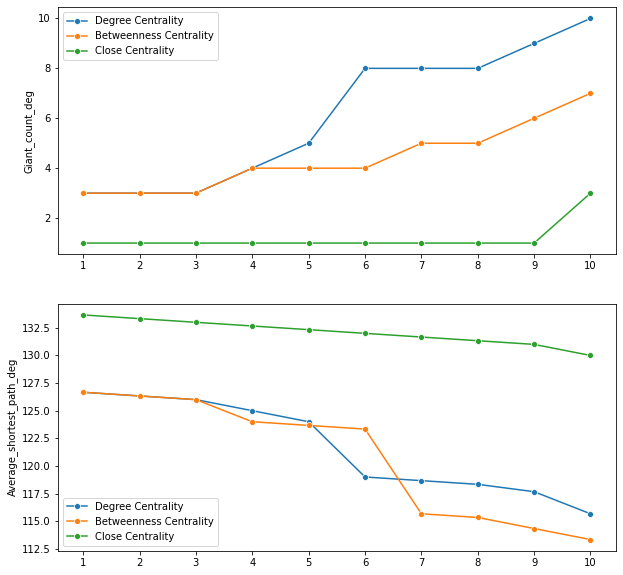

In [61]:
fig, axes = plt.subplots(2, figsize=(10, 10))

sns.lineplot(ax=axes[0],x=df_strat_1.index, y=df_strat_1.Giant_count_deg, marker="o", label="Degree Centrality")
sns.lineplot(ax=axes[0],x=df_strat_1.index, y=df_strat_1.Giant_count_bet, marker="o", label="Betweenness Centrality")
sns.lineplot(ax=axes[0],x=df_strat_1.index, y=df_strat_1.Giant_count_close, marker="o", label="Close Centrality")

sns.lineplot(ax=axes[1],x=df_strat_1.index, y=df_strat_1.Average_shortest_path_deg, marker="o", label="Degree Centrality")
sns.lineplot(ax=axes[1],x=df_strat_1.index, y=df_strat_1.Average_shortest_path_bet, marker="o", label="Betweenness Centrality")
sns.lineplot(ax=axes[1],x=df_strat_1.index, y=df_strat_1.Average_shortest_path_close, marker="o", label="Close Centrality")


<AxesSubplot:ylabel='Average_shortest_path_deg'>

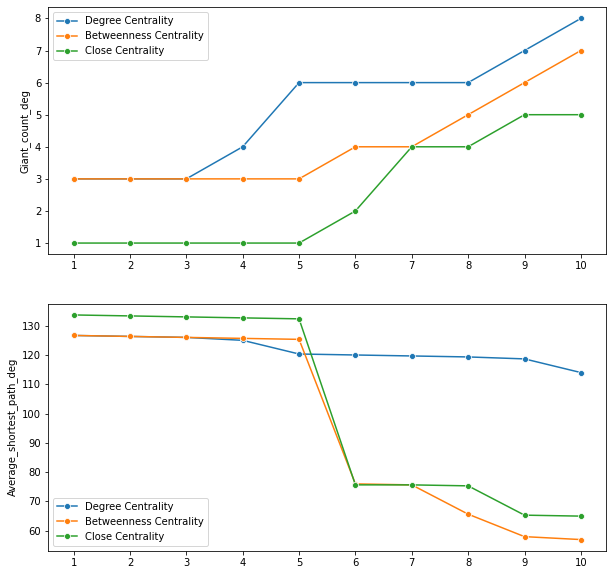

In [62]:
fig, axes = plt.subplots(2, figsize=(10, 10))

sns.lineplot(ax=axes[0],x=df_strat_2.index, y=df_strat_2.Giant_count_deg, marker="o", label="Degree Centrality")
sns.lineplot(ax=axes[0],x=df_strat_2.index, y=df_strat_2.Giant_count_bet, marker="o", label="Betweenness Centrality")
sns.lineplot(ax=axes[0],x=df_strat_2.index, y=df_strat_2.Giant_count_close, marker="o", label="Close Centrality")

sns.lineplot(ax=axes[1],x=df_strat_2.index, y=df_strat_2.Average_shortest_path_deg, marker="o", label="Degree Centrality")
sns.lineplot(ax=axes[1],x=df_strat_2.index, y=df_strat_2.Average_shortest_path_bet, marker="o", label="Betweenness Centrality")
sns.lineplot(ax=axes[1],x=df_strat_2.index, y=df_strat_2.Average_shortest_path_close, marker="o", label="Close Centrality")


### II. Flows: weighted network 

##### II.1 Adjust measure for a weighted network

In [63]:
tube_p2=tube.copy()

In [64]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the distance between stations:

bet_london_w_p2=nx.betweenness_centrality(tube_p2,weight='flows',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_p2,bet_london_w_p2,'betweenness_w')

In [65]:
# To dataframe using the nodes as the index
df_p2_1 = pd.DataFrame(index=tube_p2.nodes())
df_p2_1['betweenness_w'] = pd.Series(nx.get_node_attributes(tube_p2, 'betweenness_w'))

df_sorted_p2_1 = df_p2_1.sort_values(["betweenness_w"], ascending=False)
df_sorted_p2_1[0:10]

,betweenness_w
West Hampstead,28401.50
Gospel Oak,21947.00
Finchley Road & Frognal,21446.00
Hampstead Heath,21372.00
Willesden Junction,19166.50
Leicester Square,17097.75
Brondesbury,16526.00
Brondesbury Park,16411.50
Kensal Rise,16299.75
Blackhorse Road,16091.75


##### II.2 

##### II.3 

In [66]:
#create an empty dataframes first, for storing the values of impact measures
index_ii3 = ['Avg_shortest','Avg_shortest_weighted']
column_ii3 = ['Before_removal','After_removal']
df_ii3_1 = pd.DataFrame(index=index_ii3,columns=column_ii3)
df_ii3_2 = pd.DataFrame(index=index_ii3,columns=column_ii3)

In [67]:
df_ii3_1

,Before_removal,After_removal
Avg_shortest,NaN,NaN
Avg_shortest_weighted,NaN,NaN


In [68]:
#First, as discussed before, the betweenness centrality measure is the best performing measure in I.1
#Recall the highest ranked node in this measure first
df_sorted_bet_t[0:1]

,betweenness_t,station
1,23768.093434,Stratford


In [69]:
#Therefore, Stratford station should be removed this time

#make a copy of the network for this part
tube_p2_3=tube.copy()
print(f'Now has {len(list(tube_p2_3.nodes))} nodes')

Now has 401 nodes


In [70]:
#Evaluate the entire network first

df_ii3_1['Before_removal'][0]=nx.average_shortest_path_length(tube_p2_3)
print(nx.average_shortest_path_length(tube_p2_3))
df_ii3_1['Before_removal'][1]=nx.average_shortest_path_length(tube_p2_3, weight='flows')
print(nx.average_shortest_path_length(tube_p2_3, weight='flows'))


13.545997506234414
255693.32300498753


In [71]:
df_ii3_1

,Before_removal,After_removal
Avg_shortest,13.545998,NaN
Avg_shortest_weighted,255693.323005,NaN


In [72]:
to_remove = ['Stratford']
tube_p2_3.remove_nodes_from(to_remove)
print(f'Now has {len(list(tube_p2_3.nodes))} nodes')


Now has 400 nodes


In [73]:
#evaluate using weighted average shortest path

Subg_p2_3 = [tube_p2_3.subgraph(c).copy() for c in nx.connected_components(tube_p2_3)]
[len(subgraph.nodes) for subgraph in Subg_p2_3]

print(f'There are {len([len(subgraph.nodes) for subgraph in Subg_p2_3])} components in this network now.')

components_p2_3 = nx.connected_components(tube_p2_3)
largest_component_p2_3 = max(components_p2_3, key=len)
Largest_subgraph_p2_3 = tube_p2_3.subgraph(largest_component_p2_3)
print(f'Now the largest component has {Largest_subgraph_p2_3.number_of_nodes()} point.')

#Directly calcuate out the path with flows as the weight
df_ii3_1['After_removal'][0]=nx.average_shortest_path_length(Largest_subgraph_p2_3)
print(f'\nNow the average shortest path for the largest component is:')
print(nx.average_shortest_path_length(Largest_subgraph_p2_3))

df_ii3_1['After_removal'][1]=nx.average_shortest_path_length(Largest_subgraph_p2_3, weight='flows')
print(f'\nNow the weighted average shortest path for the largest component is:')
print(nx.average_shortest_path_length(Largest_subgraph_p2_3, weight='flows'))

There are 3 components in this network now.
Now the largest component has 379 point.

Now the average shortest path for the largest component is:
14.496447069006436

Now the weighted average shortest path for the largest component is:
248601.93230584523


In [74]:
df_ii3_1

,Before_removal,After_removal
Avg_shortest,13.545998,14.496447
Avg_shortest_weighted,255693.323005,248601.932306


In [75]:
df_sorted_p2_1[0:1]

,betweenness_w
West Hampstead,28401.5


In [76]:
tube_p2_3adj=tube.copy()
print(f'Now has {len(list(tube_p2_3adj.nodes))} nodes')

Now has 401 nodes


In [77]:
df_ii3_2['Before_removal'][0]=nx.average_shortest_path_length(tube_p2_3adj)
print(nx.average_shortest_path_length(tube_p2_3adj))
df_ii3_2['Before_removal'][1]=nx.average_shortest_path_length(tube_p2_3adj, weight='flows')
print(nx.average_shortest_path_length(tube_p2_3adj, weight='flows'))

13.545997506234414
255693.32300498753


In [78]:
df_ii3_2

,Before_removal,After_removal
Avg_shortest,13.545998,NaN
Avg_shortest_weighted,255693.323005,NaN


In [79]:
to_remove = ['West Hampstead']
tube_p2_3adj.remove_nodes_from(to_remove)
print(f'Now has {len(list(tube_p2_3adj.nodes))} nodes')

Now has 400 nodes


In [80]:
#evaluate using weighted average shortest path

Subg_p2_3adj = [tube_p2_3adj.subgraph(c).copy() for c in nx.connected_components(tube_p2_3adj)]
[len(subgraph.nodes) for subgraph in Subg_p2_3adj]

print(f'There are {len([len(subgraph.nodes) for subgraph in Subg_p2_3adj])} components in this network now.')

components_p2_3adj = nx.connected_components(tube_p2_3adj)
largest_component_p2_3adj = max(components_p2_3adj, key=len)
Largest_subgraph_p2_3adj = tube_p2_3adj.subgraph(largest_component_p2_3adj)
print(f'Now the largest component has {Largest_subgraph_p2_3adj.number_of_nodes()} point.')

#Directly calcuate out the path with flows as the weight
df_ii3_2['After_removal'][0]=nx.average_shortest_path_length(Largest_subgraph_p2_3adj)
print(f'\nNow the average shortest path for the largest component is:')
print(nx.average_shortest_path_length(Largest_subgraph_p2_3adj))

df_ii3_2['After_removal'][1]=nx.average_shortest_path_length(Largest_subgraph_p2_3adj, weight='flows')
print(f'\nNow the average weighted shortest path for the largest component is:')
print(nx.average_shortest_path_length(Largest_subgraph_p2_3adj, weight='flows'))

There are 1 components in this network now.
Now the largest component has 400 point.

Now the average shortest path for the largest component is:
13.710764411027569

Now the average weighted shortest path for the largest component is:
287413.5063408521


In [81]:
df_ii3_2

,Before_removal,After_removal
Avg_shortest,13.545998,13.710764
Avg_shortest_weighted,255693.323005,287413.506341


In [82]:
#Compare with the removal using I.1's topological betweenness centrality measure
df_ii3_1

,Before_removal,After_removal
Avg_shortest,13.545998,14.496447
Avg_shortest_weighted,255693.323005,248601.932306
